In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

titanic_test = pd.read_csv("data/test.csv")
titanic_train = pd.read_csv("data/train.csv")

X_test = titanic_test.loc[:, ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
ids = titanic_test.loc[:, ["PassengerId"]]

X_train = titanic_train.loc[:, ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
Y_train = titanic_train.iloc[:, 1]

X_test["Age"].fillna(X_test["Age"].median(), inplace=True)
X_test["Embarked"].fillna(X_test["Embarked"].mode()[0], inplace=True)
X_train["Age"].fillna(X_train["Age"].median(), inplace=True)
X_train["Embarked"].fillna(X_train["Embarked"].mode()[0], inplace=True)



X_test = pd.get_dummies(X_test, columns=["Sex", "Embarked"], drop_first=True) #Convert string columns in values
X_train = pd.get_dummies(X_train, columns=["Sex", "Embarked"], drop_first=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
X_test_scaled["Fare"].fillna(X_test_scaled["Fare"].median(), inplace=True)



X_train, X_val, y_train, y_val = train_test_split(X_train_scaled,Y_train,test_size=0.8,shuffle=True)

C:\Users\mauri\AppData\Local\Temp\ipykernel_12544\3923545609.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test["Age"].fillna(X_test["Age"].median(), inplace=True)
C:\Users\mauri\AppData\Local\Temp\ipykernel_12544\3923545609.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

Random forest:

In [30]:
from scipy.stats import mode
class MyRandomForestClassifier () :
  def __init__ ( self , n_estimators , max_features ) :
    self.n_estimators =  n_estimators
    self.max_features = max_features

  # train the trees of this random forest using subsets of X ( and y )
  def fit ( self , X_train , y_train ) : #these are already X train and y_train


    self.trees = []
    self.features_list = []

    for i in range(self.n_estimators):
      tree = DecisionTreeClassifier()
      indices = np.random.choice(len(X_train), len(X_train), replace=True)

      n_feats = int(np.round(np.sqrt(self.max_features)))
      features = np.random.choice(range(self.max_features), n_feats, replace=False) #take sqrt(maxfeatures) features from 0 to max_feat
      self.features_list.append(features)

      tree.fit(X_train.iloc[indices,features].to_numpy(),y_train.iloc[indices].to_numpy())
      self.trees.append(tree)

  def majority_voting (self,predictions):
      most_common = pd.DataFrame.mode(pd.DataFrame(predictions), axis=1)[0]
      return most_common



  # predict the label for each point in X
  def predict ( self , X_test ) :
    predictions = np.zeros((len(X_test),self.n_estimators))
    for i, tree in enumerate(self.trees):
        features = self.features_list[i]
        prediction = (tree.predict(X_test.iloc[:, features].to_numpy()))
        predictions[:, i] = prediction


   # predictions = self.majority_voting(predictions)
    return mode(predictions, axis=1, keepdims=False).mode.astype(int)

Hyperparameters tuning: (estimators)

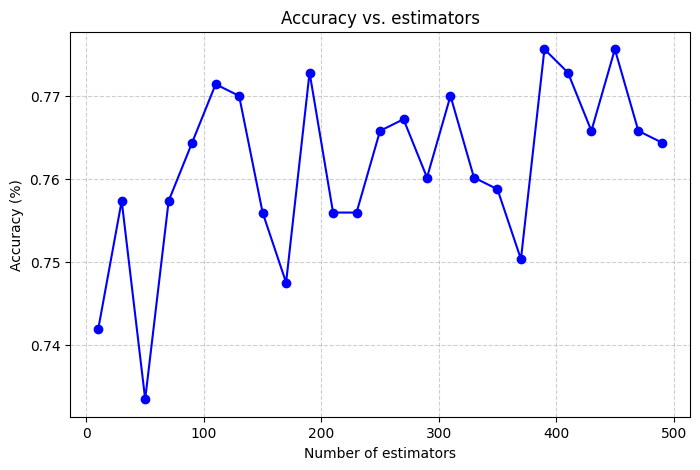

In [33]:

max_features = int(8)
accuracies = []
est_min = 10
est_max = 500
estimator_list = range(est_min,est_max+10,20)
for est in estimator_list:
  rf = MyRandomForestClassifier(est, max_features)
  rf.fit(X_train,y_train.astype(int))
  pred= rf.predict(X_val)
  accuracies.append(accuracy_score(y_val.astype(int),pred))

plt.figure(figsize=(8, 5))
plt.plot(estimator_list, accuracies, marker='o', linestyle='-', color='b')
plt.title(f"Accuracy vs. estimators")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Probably 250 is a good number of estimators

In [38]:
estimators = 250
max_features = 8
rf = MyRandomForestClassifier(estimators, max_features)
rf.fit(X_train,y_train.astype(int))
pred = (rf.predict(X_test_scaled))

In [39]:
print(pred)

[0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [40]:

predictions = pred.copy()
predictions = pd.DataFrame(predictions)

predictions.insert(0, "PassengerId", ids)
predictions.columns = ["PassengerId", "Survived"]
predictions.to_csv("submission.csv", index=False)

Final accuracy: 76%